# 🧠 Customer Segmentation using K-Means Clustering

This notebook demonstrates how to segment shopping mall customers into distinct groups using unsupervised learning (K-Means clustering). 

---

## 📍 Step 1: Importing Libraries

We start by importing necessary libraries for:
- Data manipulation → `pandas`
- Visualization → `matplotlib`, `seaborn`
- Clustering → `scikit-learn`

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## 📍 Step 2: Loading the Dataset

We load the customer dataset containing:
- `Customer ID`
- `Gender`
- `Age`
- `Annual Income`
- `Spending Score`

In [2]:
df = pd.read_csv("Shopping Mall Customer Segmentation Data .csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,1,30,Male,151479,89
1,2,58,Female,185088,95
2,3,62,Female,70912,76
3,4,23,Male,55460,57
4,5,24,Male,153752,76


## 📍 Step 3: Data Cleaning & Preprocessing

### ✅ Dropped:
- `Customer ID` (not useful for clustering)


In [4]:
df = df.drop('Customer ID', axis=1)

### ✅ Optional:
- `Gender` (categorical — skipped for now)

In [5]:
df_cluster = df.drop('Gender', axis=1)

## 📍 Step 4: Feature Selection

We selected the following features for clustering:
- `Age`
- `Annual Income`
- `Spending Score`

These features help in identifying spending behavior and financial capability.


## 📍 Step 5: Feature Scaling

Used `StandardScaler` to normalize the features.  
Why? Because K-Means is a **distance-based algorithm** and features must be on the same scale to avoid bias.


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

## 📍 Step 6: Finding Optimal Clusters (Elbow Method)

Plotted inertia for `k = 1 to 10` to observe the **elbow point**, which indicates the optimal number of clusters.  
Chosen value of `k = 5` based on the graph.

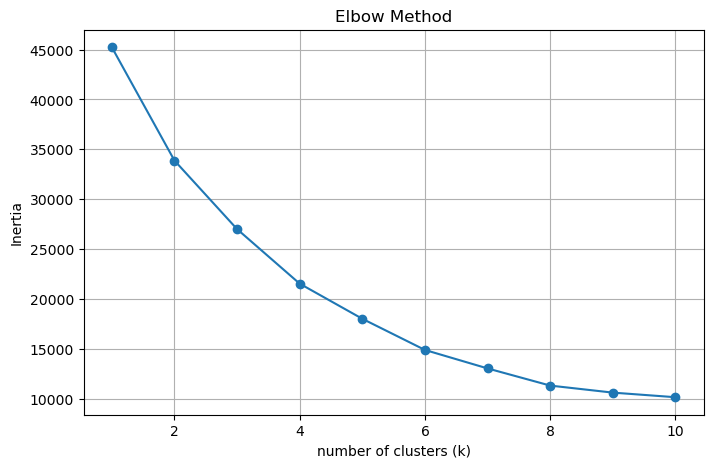

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

# Trying k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state= 42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# plotting the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()
    

## 📍 Step 7: Applying K-Means

Used `KMeans(n_clusters=5)` to segment the customers into 5 distinct clusters.


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(scaled_data)

## 📍 Step 8: Assign Cluster Labels

Added a new column `Cluster` to the DataFrame that stores the cluster each customer belongs to.


## 📍 Step 9: Visualizing the Clusters

Plotted clusters in 2D using:
- `Annual Income` (x-axis)
- `Spending Score` (y-axis)

Each cluster is color-coded for easy identification.



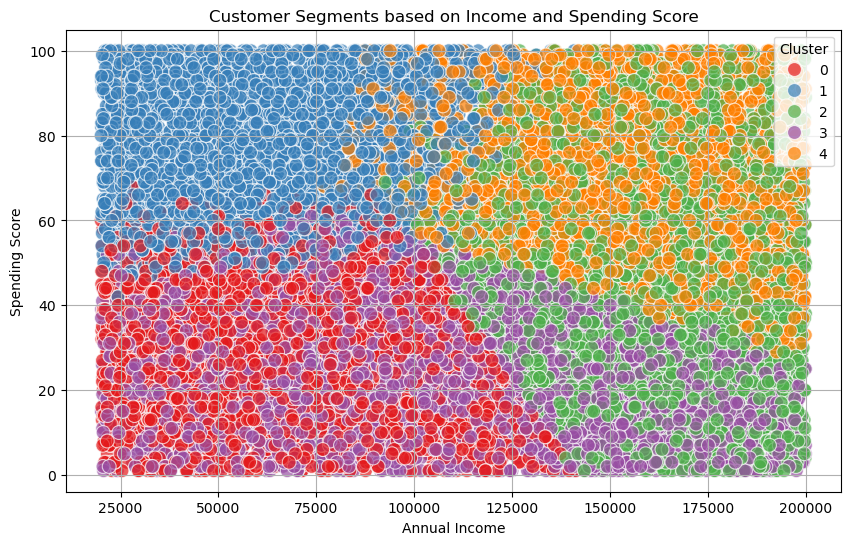

In [9]:
# Add cluster labels to original dataframe for plotting 
df_cluster['Cluster'] = y_kmeans

# Plot clusters
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_cluster,
    x = 'Annual Income',
    y = 'Spending Score',
    hue = 'Cluster',
    palette='Set1',
    s=100,
    alpha= 0.7
)
plt.title("Customer Segments based on Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

## 📍 Step 10: Interpreting the Segments

| Cluster | Income Level     | Spending Score | Segment Type                        |
|---------|------------------|----------------|-------------------------------------|
| 0       | Low–Mid Income   | Low Spending   | 💤 Budget/Frugal Buyers             |
| 1       | Low–Mid Income   | High Spending  | 💸 Impulsive/Value Seekers          |
| 2       | High Income      | Low Spending   | 🧊 Conservative Rich                |
| 3       | Mid–High Income  | Moderate Spend | 🛍️ Average or Target Customers      |
| 4       | High Income      | High Spending  | 🔥 Premium/Loyal Customers          |


## ✅ Conclusion

- K-Means helped uncover **hidden customer segments**
- Businesses can now **personalize strategies** for each group
- This is a key application of **unsupervised machine learning**

## 🛠 Tools Used

- Python
- Pandas
- Scikit-learn
- Matplotlib
- Seaborn